In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression

%matplotlib inline

warnings.filterwarnings('ignore')

In [15]:
data_GOOG_fixed = pd.read_excel("Data/Data_GOOG.xlsx")
data_IBM_fixed = pd.read_excel("Data/Data_IBM.xlsx")
data_AAPL_fixed = pd.read_excel("Data/Data_AAPL.xlsx")

In [28]:
class TrendAnalyzer():
    def __init__(self, data: pd.DataFrame, column_of_interest: str):
        self.regression = LinearRegression()
        self.column = column_of_interest
        
        self.prepare_data(data)
        self.init_regression()
        
    def init_regression(self):
        self.regression.fit(self.x, self.y)
        self.preds = self.regression.predict(self.x)
        self.cals_errors()
        
    def prepare_data(self, data: pd.DataFrame):
        self.x = data.index.to_numpy().reshape(-1,1)
        self.y = data[self.column].to_numpy().reshape(-1,1)
        assert self.y.shape[0] == self.x.shape[0], "Wrong len"
        
    def cals_errors(self):
        self.err = self.y - self.preds
        
    def get_r_square(self):
        squared_errors = (self.err**2).sum()
        mean_y = self.y.mean()
        squared_deviations = sum([(observation - mean_y)**2 for observation in self.y.flatten().tolist()])
        r_square = 1 - squared_errors/squared_deviations
        return r_square
    
    def get_errors_expectation(self):
        return self.err.mean()
        
    def draw_plot_with_trend(self):
        plt.plot(self.x.flatten(), self.y.flatten(), self.x.flatten(), self.preds.flatten())
    
    def draw_plot_without_trend(self):
        plt.figure(figsize = (12,7))
        plt.plot(self.x.flatten(), self.err.flatten(), self.x.flatten(), np.zeros((len(self.x.flatten()))))
        
    def draw_plots(self):
        fig, axes = plt.subplots(1, 2, figsize=(22, 7))
        axes[0].plot(self.x.flatten(), self.y.flatten(), self.x.flatten(), self.preds.flatten())
        axes[1].plot(self.x.flatten(), self.err.flatten(), self.x.flatten(), np.zeros((len(self.x.flatten()))))
        axes[0].set_title("Data with trend line")
        axes[1].set_title("Data after removing trend")
        
        
class LogarithmicTrendAnalyzer(TrendAnalyzer):
    def __init__(self, data: pd.DataFrame, column_of_interest: str):
        super(LogarithmicTrendAnalyzer, self).__init__(data, column_of_interest)
        
    def init_regression(self):
        self.regression.fit(self.x, np.log(self.y))
        self.preds = np.exp(self.regression.predict(self.x))
        self.cals_errors()
        
        
class SquareTrendAnalyzer(TrendAnalyzer):
    def __init__(self, data: pd.DataFrame, column_of_interest: str):
        super(SquareTrendAnalyzer, self).__init__(data, column_of_interest)
        
    def init_regression(self):
        x = np.concatenate((self.x, np.power(self.x, 2)), axis=1)
        self.regression.fit(x, self.y)
        self.preds = self.regression.predict(x)
        self.cals_errors()

R_square of linear trend: 0.8425811868411359 
Expectation of errors: -2.4169404777383158e-15


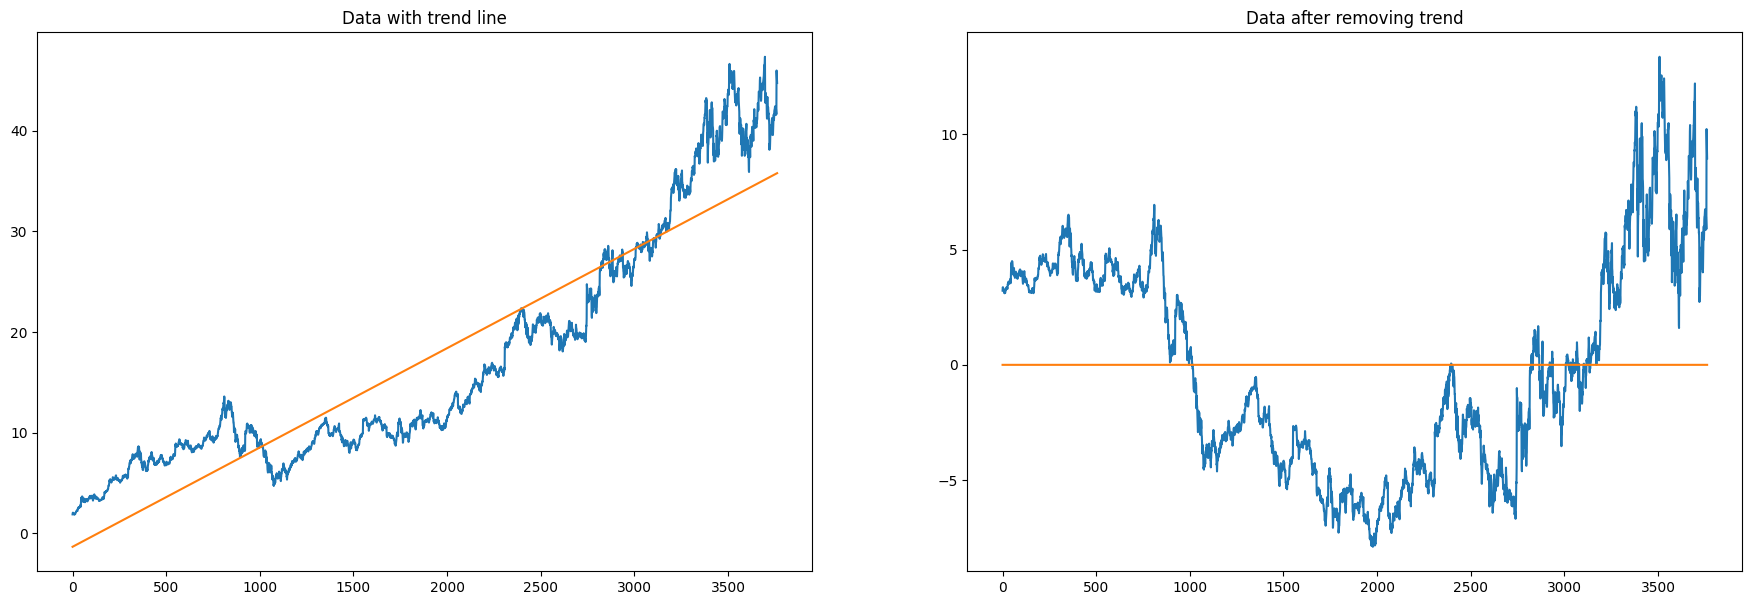

In [29]:
analyzer_GOOG = TrendAnalyzer(data_GOOG_fixed, 'Adj Close')
analyzer_GOOG.draw_plots()
print("R_square of linear trend:",analyzer_GOOG.get_r_square(), "\nExpectation of errors:", analyzer_GOOG.get_errors_expectation())

R_square of logarithmic trend: 0.9541255983895763 
Expectation of errors: 0.36314601554491616


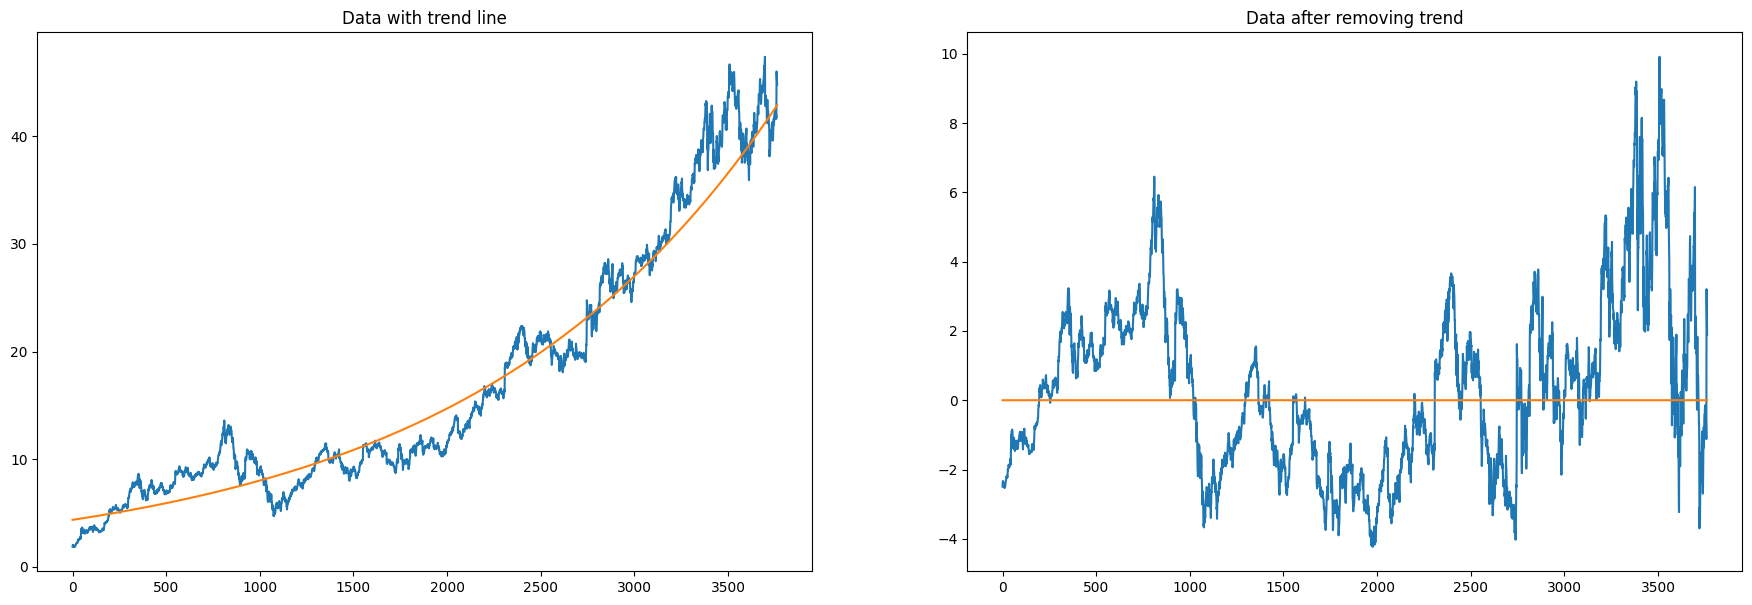

In [7]:
analyzer_GOOG_log = LogarithmicTrendAnalyzer(data_GOOG_fixed, 'Adj Close')
analyzer_GOOG_log.draw_plots()
print("R_square of logarithmic trend:",analyzer_GOOG_log.get_r_square(), "\nExpectation of errors:", analyzer_GOOG_log.get_errors_expectation())

R_square of polinomial trend: 0.9607761104982029 
Expectation of errors: -3.5951989606357445e-15


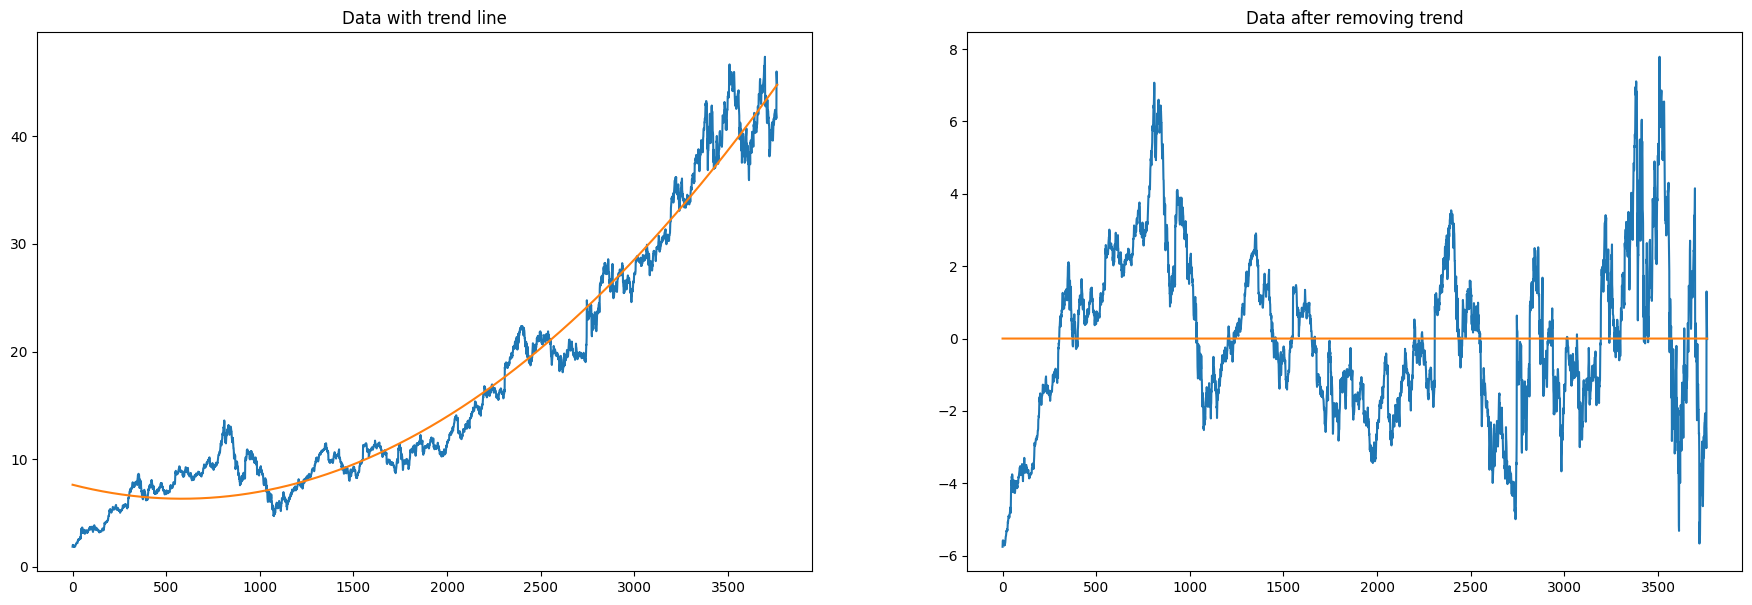

In [8]:
analyzer_GOOG_sq = SquareTrendAnalyzer(data_GOOG_fixed, 'Adj Close')
analyzer_GOOG_sq.draw_plots()
print("R_square of polinomial trend:",analyzer_GOOG_sq.get_r_square(), "\nExpectation of errors:", analyzer_GOOG_sq.get_errors_expectation())

R_square of linear trend: 0.7881861848469366 
Expectation of errors: -1.0982761728104594e-15


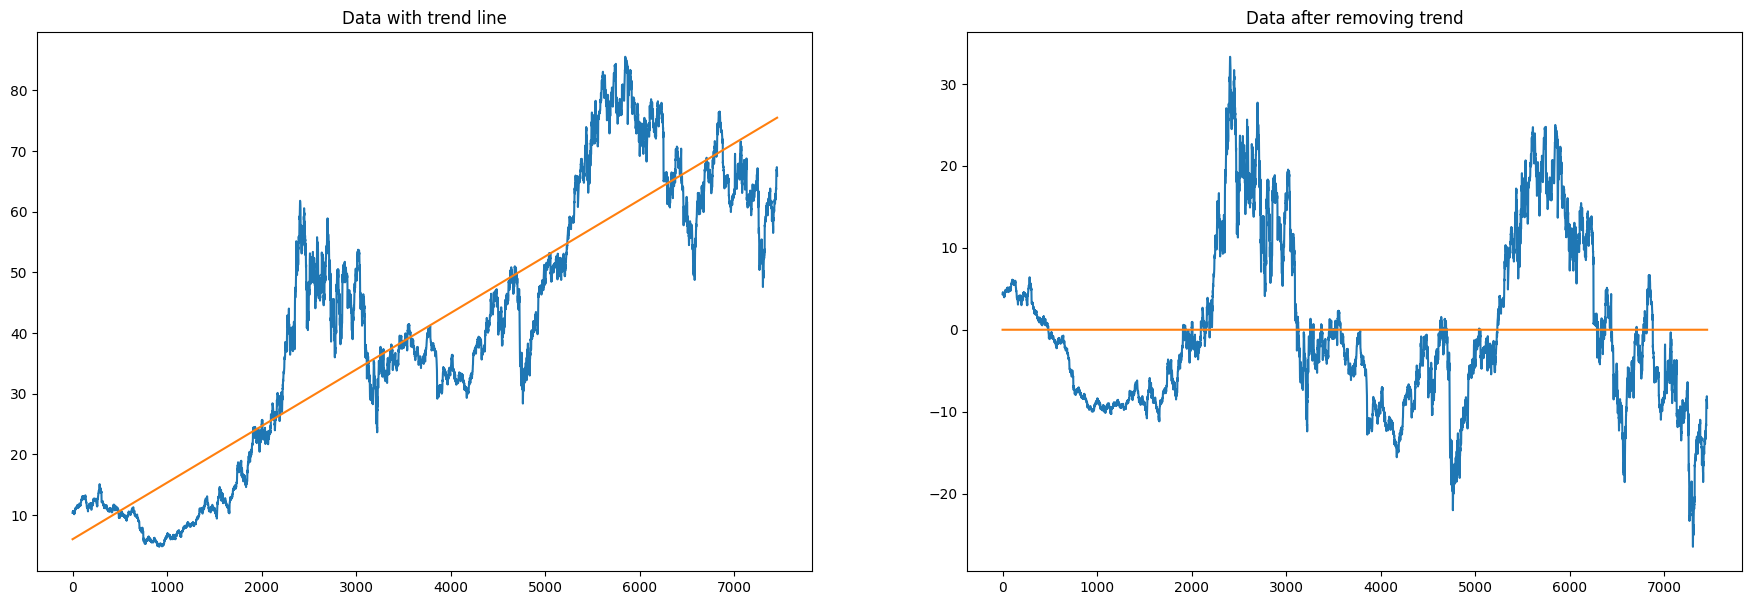

In [9]:
analyzer_IBM = TrendAnalyzer(data_IBM_fixed, 'Adj Close')
analyzer_IBM.draw_plots()
print("R_square of linear trend:",analyzer_IBM.get_r_square(), "\nExpectation of errors:", analyzer_IBM.get_errors_expectation())

R_square of logarithmic trend: 0.5891030608940742 
Expectation of errors: 0.7994516779142214


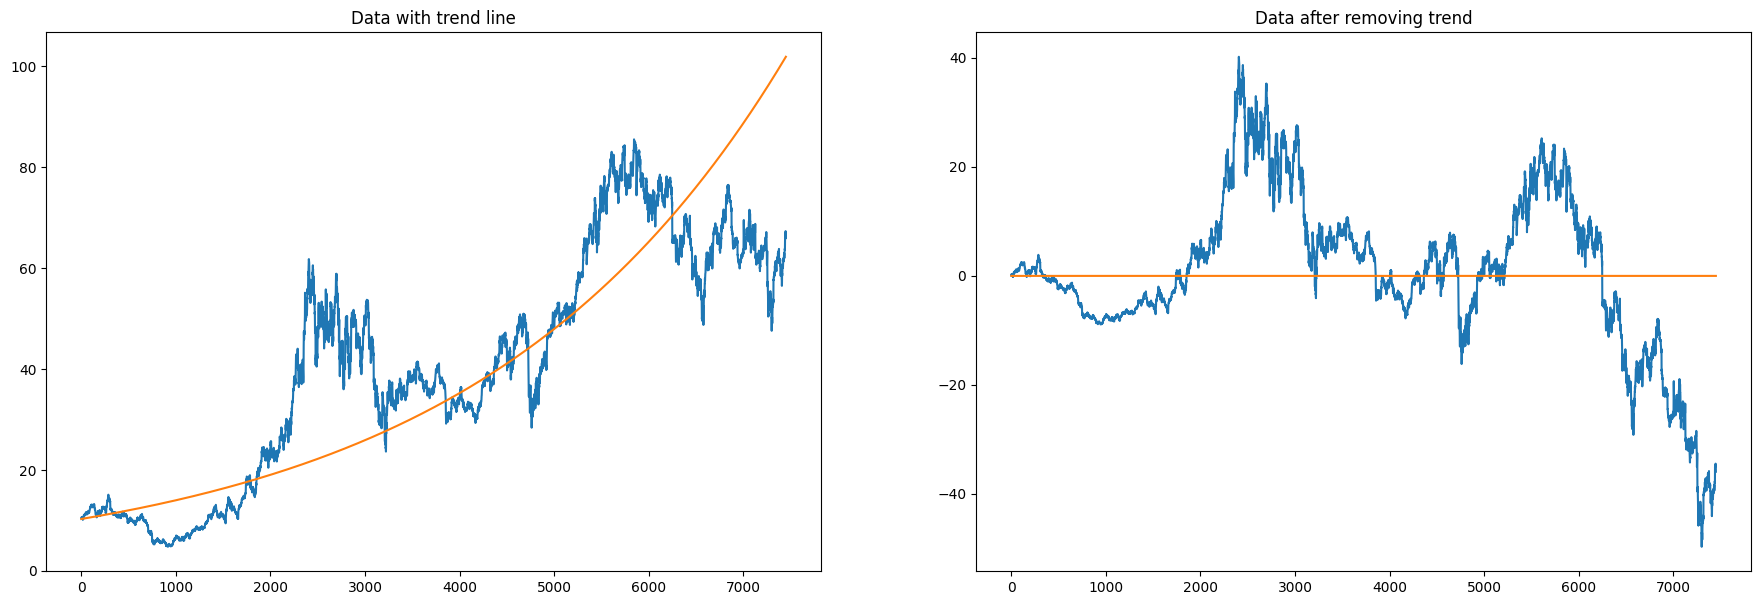

In [10]:
analyzer_IBM_log = LogarithmicTrendAnalyzer(data_IBM_fixed, 'Adj Close')
analyzer_IBM_log.draw_plots()
print("R_square of logarithmic trend:",analyzer_IBM_log.get_r_square(), "\nExpectation of errors:", analyzer_IBM_log.get_errors_expectation())

R_square of polinomial trend: 0.7949760477527057 
Expectation of errors: -2.196552345620919e-15


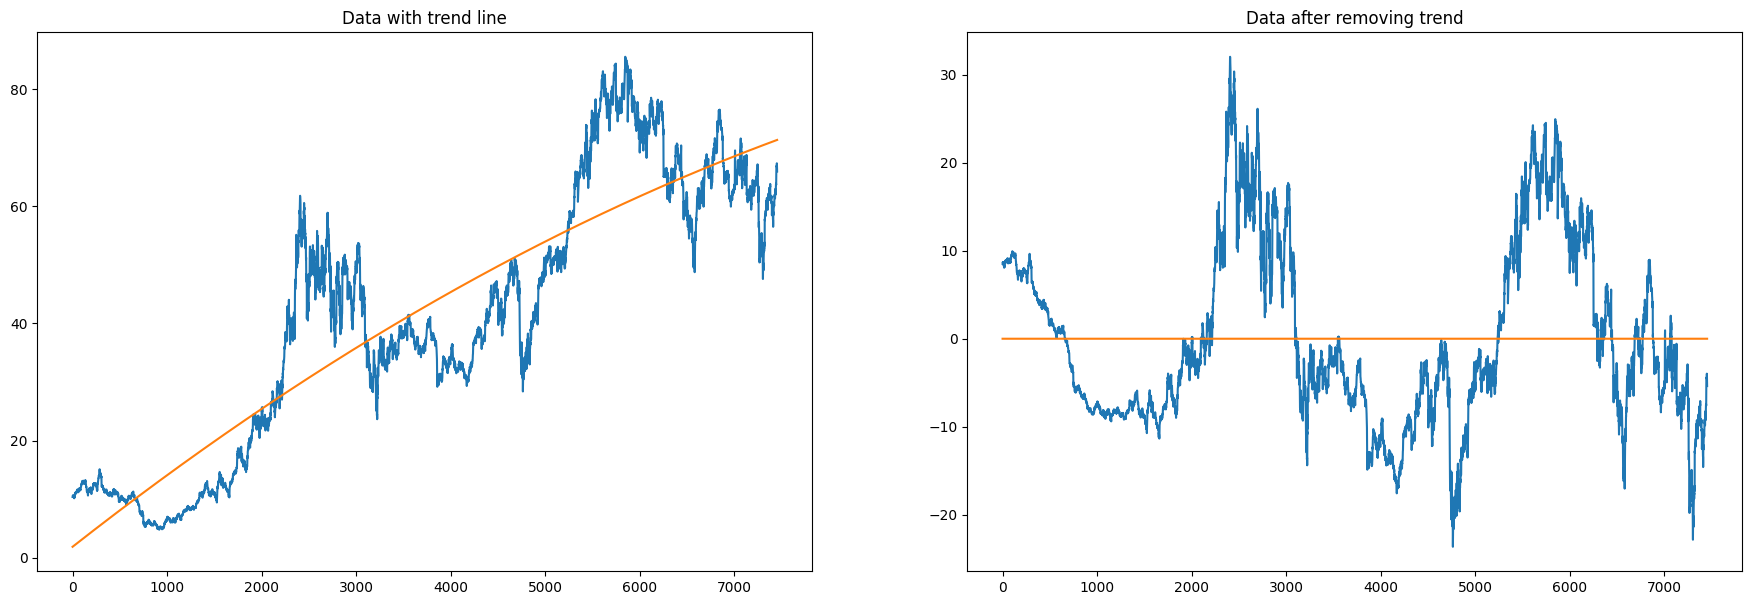

In [11]:
analyzer_IBM_sq = SquareTrendAnalyzer(data_IBM_fixed, 'Adj Close')
analyzer_IBM_sq.draw_plots()
print("R_square of polinomial trend:",analyzer_IBM_sq.get_r_square(), "\nExpectation of errors:", analyzer_IBM_sq.get_errors_expectation())

R_square of linear trend: 0.7673561966806169 
Expectation of errors: -1.600659454017825e-16


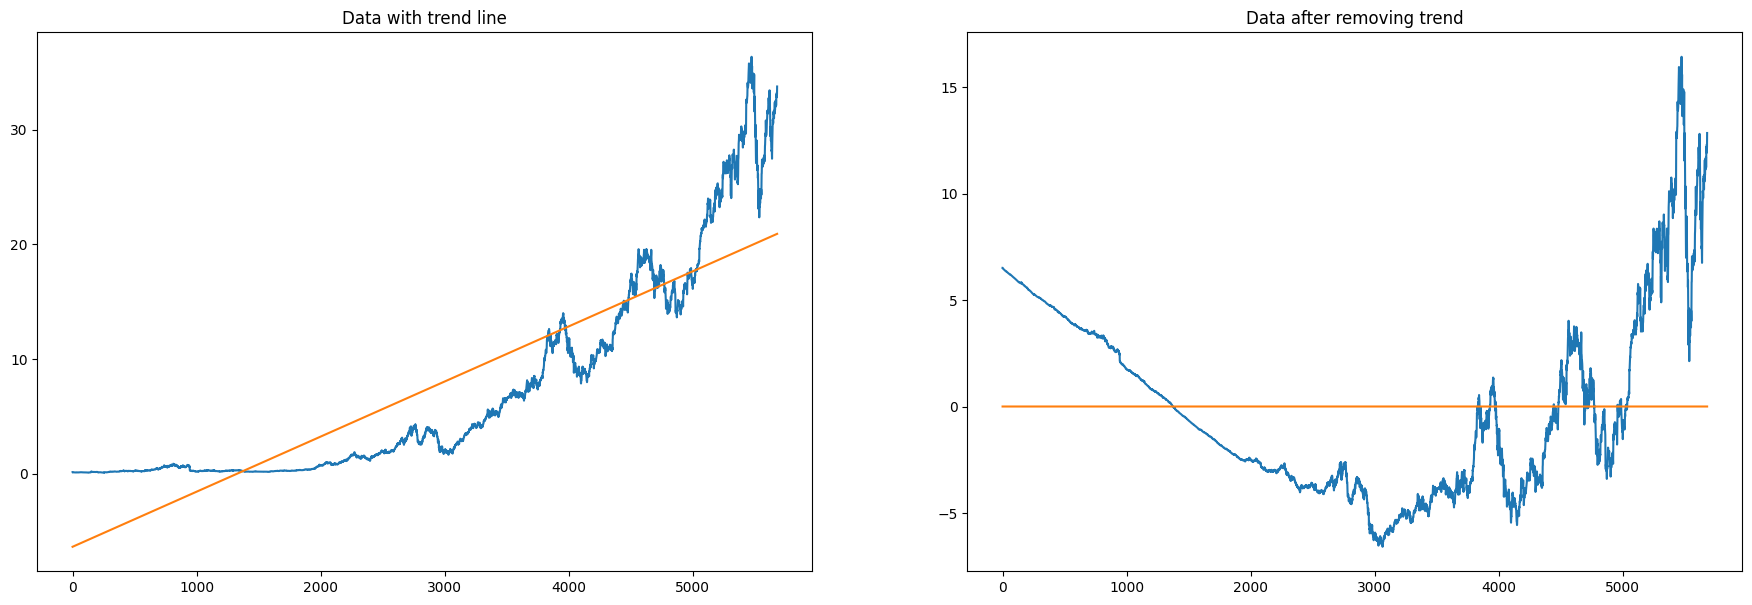

In [17]:
analyzer_AAPL = TrendAnalyzer(data_AAPL_fixed, 'Adj Close')
analyzer_AAPL.draw_plots()
print("R_square of linear trend:", analyzer_AAPL.get_r_square(), "\nExpectation of errors:", analyzer_AAPL.get_errors_expectation())

R_square of logarithmic trend: 0.8692206149805153 
Expectation of errors: -0.35424770451511056


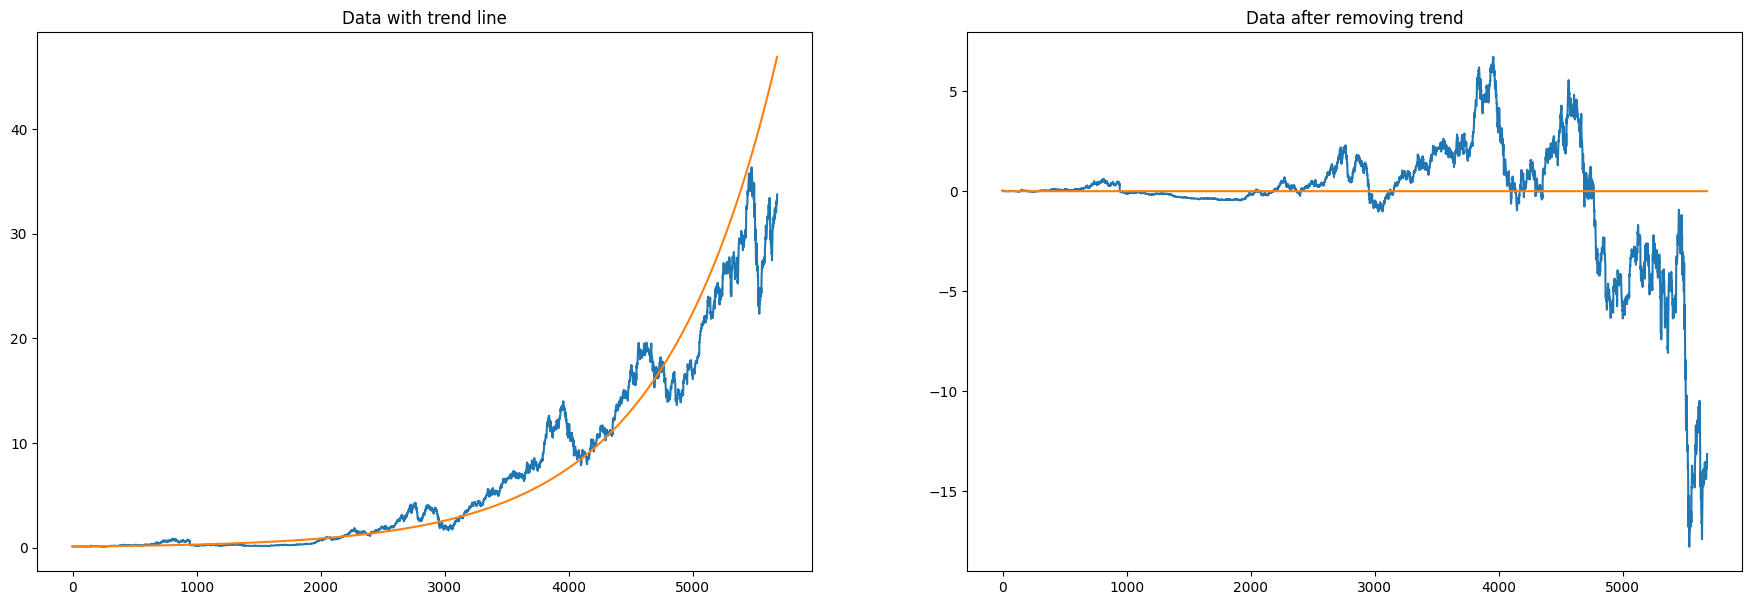

In [18]:
analyzer_AAPL_log = LogarithmicTrendAnalyzer(data_AAPL_fixed, 'Adj Close')
analyzer_AAPL_log.draw_plots()
print("R_square of logarithmic trend:", analyzer_AAPL_log.get_r_square(), "\nExpectation of errors:", analyzer_AAPL_log.get_errors_expectation())

R_square of polinomial trend: 0.9603586961676062 
Expectation of errors: 6.002472952566844e-17


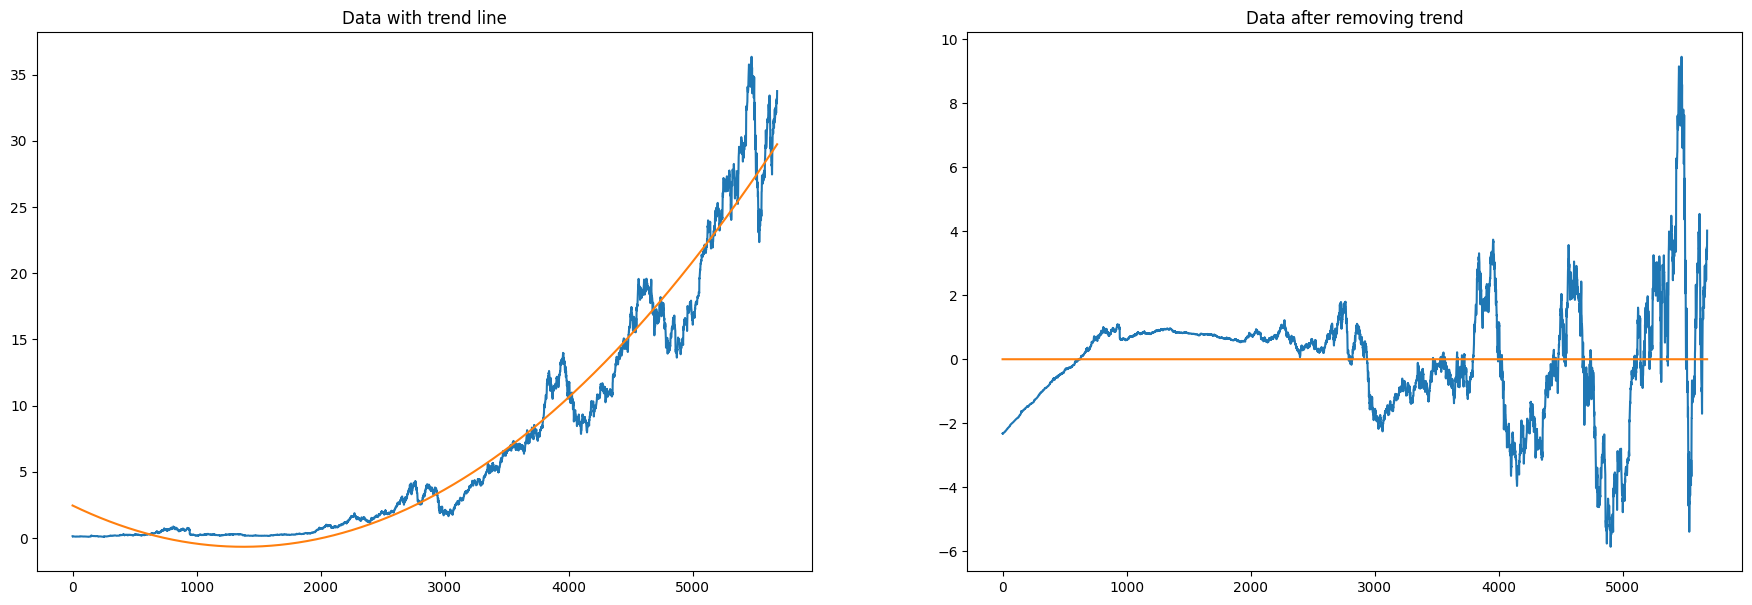

In [19]:
analyzer_AAPL_sq = SquareTrendAnalyzer(data_AAPL_fixed, 'Adj Close')
analyzer_AAPL_sq.draw_plots()
print("R_square of polinomial trend:", analyzer_AAPL_sq.get_r_square(), "\nExpectation of errors:", analyzer_AAPL_sq.get_errors_expectation())

In [22]:
data_GOOG_without_trend = pd.DataFrame(analyzer_GOOG_sq.err, columns=['Adj Close'])
data_IBM_without_trend = pd.DataFrame(analyzer_IBM_sq.err, columns=['Adj Close'])
data_AAPL_without_trend = pd.DataFrame(analyzer_AAPL_sq.err, columns=['Adj Close'])

data_GOOG_without_trend.to_excel("Data/Data_GOOG_No_Trend.xlsx")
data_IBM_without_trend.to_excel("Data/Data_IBM_No_Trend.xlsx")
data_AAPL_without_trend.to_excel("Data/Data_AAPL_No_Trend.xlsx")